# Text mining and search exam notebook: Text Summarizer
Authors: Gaetano Chiriaco, Riccardo Porcedda, Gianmarco Russo

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
main_sent = pd.read_csv("drive/MyDrive/TM&S/data/main_grams_features.csv")
abs_sent = pd.read_csv("drive/MyDrive/TM&S/data/abs_features.csv")

In [ ]:
from ast import literal_eval

main_sent["clean_sent"] = main_sent["clean_sent"].apply(literal_eval)

In [ ]:
main_sent.head()

,title,sentences,clean_sent,sent_len,sent_pos,clean_sent_grams,topics_sim,ROUGE-2,summ_pos,tf_idf
0,Self-Organization of Associative Database and ...,Let a mapping f : X -+ Y be given.,"[let, mapping, given]",3,0.005051,"['let', 'mapping', 'given']",0.676909,0.0,-1.0,0.049192
1,Self-Organization of Associative Database and ...,"Here, X is a finite or infinite set, and Y is ...","[finite, infinite, set, another, finite, infin...",7,0.010101,"['finite_infinite', 'set', 'another', 'finite_...",0.474625,0.0,-1.0,0.038056
2,Self-Organization of Associative Database and ...,A learning machine observes any set of pairs (...,"[learning, machine, observes, set, pair, sampl...",7,0.015152,"['learning', 'machine', 'observes', 'set', 'pa...",0.616646,0.0,-1.0,0.048948
3,Self-Organization of Associative Database and ...,(X x Y means the Cartesian product of X and Y.),"[mean, cartesian, product]",3,0.020202,"['mean', 'cartesian_product']",0.516420,0.0,-1.0,0.022411
4,Self-Organization of Associative Database and ...,"And, it computes some estimate j : X -+ Y of f...","[computes, estimate, make, small, estimation, ...",7,0.025253,"['computes', 'estimate', 'make', 'small', 'est...",0.664286,0.0,-1.0,0.034419


In [ ]:
abs_sent.head()

,title,sentences,clean_sent,sent_len,sent_pos
0,Self-Organization of Associative Database and ...,An efficient method of self-organizing associ...,"['efficient', 'method', 'selforganizing', 'ass...",11,0.2
1,Self-Organization of Associative Database and ...,The proposed databases can associate any input...,"['proposed', 'database', 'associate', 'input',...",5,0.4
2,Self-Organization of Associative Database and ...,"In the first half part of discussion, an algor...","['first', 'half', 'part', 'discussion', 'algor...",7,0.6
3,Self-Organization of Associative Database and ...,"From an aspect of hardware, it produces a new ...","['aspect', 'hardware', 'produce', 'new', 'styl...",7,0.8
4,Self-Organization of Associative Database and ...,"In the latter half part, an applicability to h...","['latter', 'half', 'part', 'applicability', 'h...",12,1.0


#Main Signal

Create feature and target vectors

In [ ]:
len_vec = main_sent.groupby(by="title",sort=False)["sent_len"].apply(np.array)
len_vec

title
Self-Organization of Associative Database and Its Applications                           [3, 7, 7, 3, 7, 12, 4, 6, 4, 7, 26, 6, 4, 8, 7...
Bayesian Query Construction for Neural Network Models                                    [12, 11, 14, 17, 8, 8, 4, 11, 12, 7, 3, 5, 12,...
Neural Network Ensembles, Cross Validation, and Active Learning                          [8, 11, 7, 14, 3, 21, 9, 8, 9, 14, 14, 17, 7, ...
Pulsestream Synapses with Non-Volatile Analogue Amorphous-Silicon Memories               [8, 8, 7, 20, 12, 12, 17, 7, 13, 15, 5, 15, 19...
Learning to Play the Game of Chess                                                       [12, 8, 16, 13, 8, 11, 11, 12, 13, 13, 8, 7, 8...
                                                                                                               ...                        
Learning with Product Units                                                              [19, 5, 5, 7, 3, 9, 9, 11, 6, 8, 8, 7, 4, 9, 1...
Visual Speech Recogni

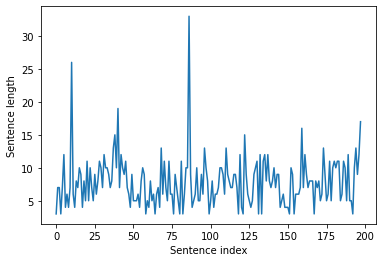

In [ ]:
import matplotlib.pyplot as plt

plt.plot(len_vec[0])
plt.xlabel("Sentence index")
plt.ylabel("Sentence length")
plt.show()

In [ ]:
tf_idf_vec = main_sent.groupby(by="title",sort=False)["tf_idf"].apply(np.array)
tf_idf_vec

title
Self-Organization of Associative Database and Its Applications                           [0.0491921813463319, 0.038055857917868, 0.0489...
Bayesian Query Construction for Neural Network Models                                    [0.0226975604012823, 0.0506242103421592, 0.049...
Neural Network Ensembles, Cross Validation, and Active Learning                          [0.0186117795070776, 0.1039222084493505, 0.104...
Pulsestream Synapses with Non-Volatile Analogue Amorphous-Silicon Memories               [0.0143254449059192, 0.0120729625266415, 0.009...
Learning to Play the Game of Chess                                                       [0.0119361854781381, 0.0735388429688791, 0.038...
                                                                                                               ...                        
Learning with Product Units                                                              [0.0365952529675762, 0.0523433467041638, 0.048...
Visual Speech Recogni

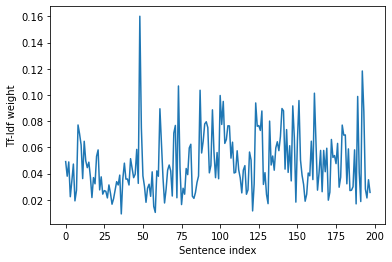

In [ ]:
plt.plot(tf_idf_vec[0])
plt.xlabel("Sentence index")
plt.ylabel("Tf-Idf weight")
plt.show()

In [ ]:
sentpos_vec = main_sent.groupby(by="title",sort=False)["sent_pos"].apply(np.array)
sentpos_vec

title
Self-Organization of Associative Database and Its Applications                           [0.005050505050505, 0.0101010101010101, 0.0151...
Bayesian Query Construction for Neural Network Models                                    [0.0077519379844961, 0.0155038759689922, 0.023...
Neural Network Ensembles, Cross Validation, and Active Learning                          [0.0076923076923076, 0.0153846153846153, 0.023...
Pulsestream Synapses with Non-Volatile Analogue Amorphous-Silicon Memories               [0.0050761421319796, 0.0101522842639593, 0.015...
Learning to Play the Game of Chess                                                       [0.006060606060606, 0.0121212121212121, 0.0181...
                                                                                                               ...                        
Learning with Product Units                                                              [0.0039840637450199, 0.0079681274900398, 0.011...
Visual Speech Recogni

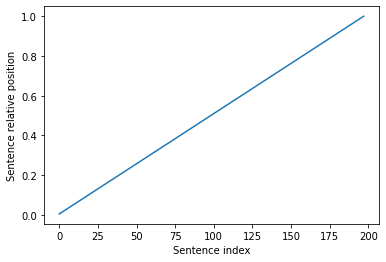

In [ ]:
plt.plot(sentpos_vec[0])
plt.xlabel("Sentence index")
plt.ylabel("Sentence relative position")
plt.show()

In [ ]:
top_vec = main_sent.groupby(by="title",sort=False)["topics_sim"].apply(np.array)
top_vec

title
Self-Organization of Associative Database and Its Applications                           [0.67690873, 0.47462502, 0.61664605, 0.5164203...
Bayesian Query Construction for Neural Network Models                                    [0.7875476, 0.6459928, 0.65661824, 0.4796195, ...
Neural Network Ensembles, Cross Validation, and Active Learning                          [0.27119577, 0.7095487, 0.26994172, 0.27268067...
Pulsestream Synapses with Non-Volatile Analogue Amorphous-Silicon Memories               [0.7288097, 0.18300974, 0.7825711, 0.17422086,...
Learning to Play the Game of Chess                                                       [0.24398297, 0.2439772, 0.24204978, 0.24259774...
                                                                                                               ...                        
Learning with Product Units                                                              [0.5154555, 0.5844335, 0.49541867, 0.48666337,...
Visual Speech Recogni

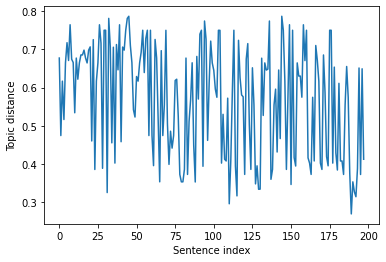

In [ ]:
plt.plot(top_vec[0])
plt.xlabel("Sentence index")
plt.ylabel("Topic distance")
plt.show()

In [ ]:
rouge_vec = main_sent.groupby(by="title",sort=False)["ROUGE-2"].apply(np.array)
pos_vec = main_sent.groupby(by="title",sort=False)["summ_pos"].apply(np.array)

In [ ]:
from keras.utils import pad_sequences

# Pad sequences, so that all documents have vector representation of same length
len_vec = pad_sequences(len_vec, maxlen=896, padding='post', dtype='int32', value=-1)
tf_idf_vec = pad_sequences(tf_idf_vec, maxlen=896, padding='post', dtype='float32', value=-1)
top_vec = pad_sequences(top_vec, maxlen=896, padding='post', dtype='float32', value=-1)
sentpos_vec = pad_sequences(sentpos_vec, maxlen=896, padding='post', dtype='float32', value=-1)
rouge_vec = pad_sequences(rouge_vec, maxlen=896, padding='post', dtype='float32', value=-1)
pos_vec = pad_sequences(pos_vec, maxlen=896, padding='post', dtype='float32', value=-1)

In [ ]:
# Stack feature vectors
X = np.dstack((len_vec,tf_idf_vec,top_vec))
X.shape

(6194, 896, 3)

In [ ]:
# ROUGE-2 Target vector
y_top = np.array(rouge_vec)
y_top.shape

(6194, 896)

In [ ]:
# Binarized ROUGE-2 target vector
y_top2 = y_top.copy()

y_top2[y_top2<=0]=0
y_top2[y_top2>0]=1

In [ ]:
# Best relative position vector
y_pos = np.array(pos_vec)
y_pos.shape

(6194, 896)

In [ ]:
# -1 indicates that no matching sentence in the reference was found (ROUGE-2=0)
# We want these sentences as last ones (relative position equal to 1)
y_pos2 = y_pos.copy()

y_pos2[y_pos2==-1]=1

# First model

Here we build the 1D U-Net Architecture

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [ ]:
def double_conv(x, n_filters):
  # First Block: Conv1D, Batch Normalization and ReLU activation
  x = layers.Conv1D(filters = n_filters, kernel_size = 3, padding = "same")(x)
  x = layers.BatchNormalization()(x)
  x = layers.Activation("relu")(x)

  #Second Block
  x = layers.Conv1D(filters = n_filters, kernel_size = 3, padding = "same")(x)
  x = layers.BatchNormalization()(x)
  x = layers.Activation("relu")(x)

  return x

In [ ]:
def downsample(x, n_filters, strides):
  x = double_conv(x, n_filters)
  y = layers.Conv1D(filters = n_filters, kernel_size = 3, padding = "same", strides = strides)(x)
  y = layers.BatchNormalization()(y)
  y = layers.Activation("relu")(y)

  return x, y

In [ ]:
def upsample(x, skip_conn, n1_filters, n2_filters, strides):
  # upsample
  x = layers.Conv1DTranspose(filters = n1_filters, kernel_size = 3, strides = strides, padding="same")(x)
  # concatenate
  x = layers.concatenate([x, skip_conn])
  # dropout
  x = layers.Dropout(0.3)(x)
  # Conv1D twice with ReLU activation
  x = double_conv(x, n2_filters)

  return x

In [ ]:
#Define model
def build_unet_model():
   #inputs
   inputs = layers.Input(shape=(896,3))

   masked = layers.Masking(mask_value=-1)(inputs)

   #----------encoder----------
   d1, s1 = downsample(masked, 64, 4)
   d2, s2 = downsample(s1, 128, 2)
   d3, s3 = downsample(s2, 256, 2)

   #----------bottleneck----------
   bottleneck = double_conv(s3, 512)

   #----------decoder----------
   u1 = upsample(bottleneck, d3, 512, 256, 2)
   u2 = upsample(u1, d2, 256, 128, 2)
   u3 = upsample(u2, d1, 128, 64, 4)

   #outputs
   outputs = layers.Conv1D(1, 1, padding="same", activation = "sigmoid")(u3)
   flatten = layers.Flatten()(outputs)

   #U-Net
   unet_model = tf.keras.Model(inputs, flatten, name="U-Net")

   return unet_model

In [ ]:
U_net = build_unet_model()
U_net.summary()

Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 896, 3)]     0           []                               
                                                                                                  
 masking (Masking)              (None, 896, 3)       0           ['input_1[0][0]']                
                                                                                                  
 conv1d (Conv1D)                (None, 896, 64)      640         ['masking[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 896, 64)     256         ['conv1d[0][0]']                 
 alization)                                                                                   

In [ ]:
from keras import backend as K

# Define a smoothed Jaccard Distance
def jaccard_distance(y_true, y_pred, smooth=100):
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    sum_ = K.sum(K.abs(y_true) + K.abs(y_pred), axis=-1)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return (1 - jac) * smooth

In [ ]:
U_net.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001))

Unet_history = U_net.fit(X, y_top2,
          batch_size=64, epochs=20, validation_split=0.2)

Epoch 1/20
78/78 [==============================] - 24s 121ms/step - loss: 45.8727 - val_loss: 58.9953
Epoch 2/20
78/78 [==============================] - 8s 109ms/step - loss: 29.7629 - val_loss: 34.4923
Epoch 3/20
78/78 [==============================] - 9s 111ms/step - loss: 27.9002 - val_loss: 33.9667
Epoch 4/20
78/78 [==============================] - 8s 109ms/step - loss: 27.1680 - val_loss: 34.0650
Epoch 5/20
78/78 [==============================] - 8s 109ms/step - loss: 26.6238 - val_loss: 30.3805
Epoch 6/20
78/78 [==============================] - 9s 116ms/step - loss: 26.1702 - val_loss: 31.8386
Epoch 7/20
78/78 [==============================] - 9s 116ms/step - loss: 25.9312 - val_loss: 30.0154
Epoch 8/20
78/78 [==============================] - 9s 113ms/step - loss: 25.7545 - val_loss: 30.2687
Epoch 9/20
78/78 [==============================] - 9s 111ms/step - loss: 25.6420 - val_loss: 29.2708
Epoch 10/20
78/78 [==============================] - 9s 112ms/step - loss: 25.597

### Training Performance

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def plot_history(history):
  fig = make_subplots(rows=1, cols=1, subplot_titles = ["Loss"])

  # Add traces
  fig.add_trace(
      go.Scatter( y=history.history['val_loss'], name="val_loss_"),
      row = 1, col = 1,
  )

  fig.add_trace(
      go.Scatter( y=history.history['loss'], name="loss"),
      row = 1, col = 1,

  )

  # Set x-axis title
  fig.update_xaxes(title_text="Epoch")

  # Set y-axes titles
  fig.update_yaxes(title_text="Loss", row=1, col=1)

  fig.show()

In [ ]:
plot_history(Unet_history)

### Predict summarizing sentences

In [ ]:
# Predict summarizing sentences
top_pred = U_net.predict(X)

194/194 [==============================] - 4s 17ms/step


In [ ]:
top_pred.shape

(6194, 896)

# Second Model

In [ ]:
#Define model
def build_unet_model2():
   #inputs
   inputs = layers.Input(shape=(896,4))

   masked = layers.Masking(mask_value=-1)(inputs)

   #----------encoder----------
   d1, s1 = downsample(masked, 64, 4)
   d2, s2 = downsample(s1, 128, 2)
   d3, s3 = downsample(s2, 256, 2)

   #----------bottleneck----------
   bottleneck = double_conv(s3, 512)

   #----------decoder----------
   u1 = upsample(bottleneck, d3, 512, 256, 2)
   u2 = upsample(u1, d2, 256, 128, 2)
   u3 = upsample(u2, d1, 128, 64, 4)

   #outputs
   outputs = layers.Conv1D(1, 1, padding="same", activation = "sigmoid")(u3)
   flatten = layers.Flatten()(outputs)

   #U-Net
   unet_model = tf.keras.Model(inputs, flatten, name="U-Net")

   return unet_model

In [ ]:
# This time we want a model that predicts the best relative position of the sentence
Pos_net = build_unet_model2()

In [ ]:
# Use the predictions of the first model as a new feature
X2 = np.dstack((len_vec,tf_idf_vec,top_vec,top_pred))
X2.shape

(6194, 896, 4)

In [ ]:
Pos_net.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss="mse"
              )

Posnet_history = Pos_net.fit(X2, y_pos2,
          batch_size=64, epochs=20, validation_split=0.2)

Epoch 1/20
78/78 [==============================] - 14s 121ms/step - loss: 0.0467 - val_loss: 0.1091
Epoch 2/20
78/78 [==============================] - 9s 112ms/step - loss: 0.0157 - val_loss: 0.1997
Epoch 3/20
78/78 [==============================] - 9s 112ms/step - loss: 0.0123 - val_loss: 0.0195
Epoch 4/20
78/78 [==============================] - 9s 113ms/step - loss: 0.0111 - val_loss: 0.0137
Epoch 5/20
78/78 [==============================] - 9s 113ms/step - loss: 0.0106 - val_loss: 0.0133
Epoch 6/20
78/78 [==============================] - 9s 113ms/step - loss: 0.0103 - val_loss: 0.0124
Epoch 7/20
78/78 [==============================] - 9s 114ms/step - loss: 0.0101 - val_loss: 0.0124
Epoch 8/20
78/78 [==============================] - 9s 114ms/step - loss: 0.0100 - val_loss: 0.0120
Epoch 9/20
78/78 [==============================] - 9s 114ms/step - loss: 0.0099 - val_loss: 0.0121
Epoch 10/20
78/78 [==============================] - 9s 114ms/step - loss: 0.0098 - val_loss: 0.012

### Training performance

In [ ]:
plot_history(Posnet_history)

### Predict best relative position

In [ ]:
pos_pred = Pos_net.predict(X2)

194/194 [==============================] - 4s 17ms/step


In [ ]:
pos_pred.shape

(6194, 896)

# Compose summary

In [ ]:
# Threshold above which consider a sentence a summarizing one
eta = 0.1

In [ ]:
# Create a vector of paper titles
titles = main_sent["title"].unique()
titles.shape

(6194,)

In [ ]:
# Create a pre-summary dataframe
# This is a dataframe of summarizing sentences with relative sorting order
pre_summaries = pd.DataFrame(columns=["title", "sentences", "order"])

from tqdm.auto import tqdm

grouped = main_sent.groupby("title")

for i in tqdm(range(len(titles))):
  text = grouped.get_group(titles[i])["sentences"].reset_index(drop=True)

  sentences = pd.Series(text[np.where(top_pred[i]>=eta)[0]], name="sentences").reset_index(drop=True)
  orders = pd.Series(pos_pred[i][np.where(top_pred[i]>=eta)[0]], name="order").reset_index(drop=True)
  title = pd.Series(titles[i], name="title").repeat(len(sentences)).reset_index(drop=True)

  tmp = pd.concat([title, sentences, orders], axis=1)

  pre_summaries = pd.concat([pre_summaries,tmp], axis=0, ignore_index=True)

  0%|          | 0/6194 [00:00<?, ?it/s]

In [ ]:
pre_summaries[pre_summaries["title"]==titles[0]]

,title,sentences,order
0,Self-Organization of Associative Database and ...,Let a mapping f : X -+ Y be given.,0.684047
1,Self-Organization of Associative Database and ...,Usually we say that: the faster the decrease o...,0.750447
2,Self-Organization of Associative Database and ...,"And, let us advance the understanding of the s...",0.717049
3,Self-Organization of Associative Database and ...,"For a learning machine defined well, if F 3 f,...",0.873541
4,Self-Organization of Associative Database and ...,"Thus, a problem of designing a learning machin...",0.814330
5,Self-Organization of Associative Database and ...,"On the other hand, the assumed structure of f ...",0.928011
6,Self-Organization of Associative Database and ...,"Consequently, in the parameter type, the bette...",0.790485
7,Self-Organization of Associative Database and ...,American Institute of Physics 1988 768 A mai...,0.874752
8,Self-Organization of Associative Database and ...,"In other words, suppose that F 3 /, or 1 is lo...",0.793852
9,Self-Organization of Associative Database and ...,"However, if 1 is distant from F, the estimatio...",0.920747


In [ ]:
pre_summaries.to_csv("drive/MyDrive/TM&S/data/pre_summaries.csv", index=False)

In [ ]:
# Desired length of the summary (number of sentences)
summary_length = 5

# Choose the best sentences in ascending order and compose the summary
summaries = pre_summaries.sort_values(["order"],ascending=True).groupby("title", sort=False).head(summary_length).reset_index(drop=True)
summaries = summaries.sort_values(["order"],ascending=True).groupby("title", sort=False)["sentences"].aggregate(func=sum).reset_index()

summaries.rename(columns={'sentences':'summary'}, inplace=True)

summaries.to_csv("drive/MyDrive/TM&S/data/summaries.csv", index=False)

# ROUGE METRIC

In [ ]:
summaries = pd.read_csv("drive/MyDrive/TM&S/data/summaries.csv")

In [ ]:
references = abs_sent.groupby("title",sort=False)["sentences"].aggregate(func=sum).reset_index()

references.rename(columns={'sentences':'reference'}, inplace=True)

In [ ]:
!pip install rouge
from rouge import Rouge

# Compute ROUGE-2 Recall and return a dataframe of summaries, abstracts and ROUGE-2 scores
def compute_rouge(hyps,refs):
  df = refs.merge(hyps,on="title")

  df["ROUGE-2"]=0.

  scores = Rouge(metrics=["rouge-2"]).get_scores(df["summary"], df["reference"], avg=False)

  for i in range(len(scores)):
    df["ROUGE-2"][i]=scores[i]["rouge-2"].get("r")

  return df

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
rouge_scores = compute_rouge(summaries, references)

<ipython-input-7-2a67c61eb323>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ROUGE-2"][i]=scores[i]["rouge-2"].get("r")


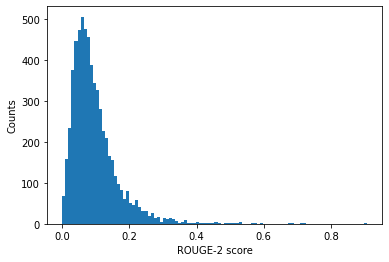

In [ ]:
import matplotlib.pyplot as plt

# Distribution of ROUGE-2 scores
plt.hist(rouge_scores["ROUGE-2"], bins=100)
plt.xlabel("ROUGE-2 score")
plt.ylabel("Counts")
plt.show()

In [ ]:
np.mean(rouge_scores["ROUGE-2"])

0.09677699633115704

In [ ]:
np.std(rouge_scores["ROUGE-2"])

0.07149867260953391

In [ ]:
np.argmax(rouge_scores["ROUGE-2"])

1104

In [ ]:
rouge_scores["ROUGE-2"][1104]

0.90625

In [ ]:
rouge_scores["title"][1104]

'A Neural Network for Feature Extraction'

In [ ]:
rouge_scores["reference"][1104]

' The paper suggests a statistical framework for the parameter estimation problem associated with unsupervised learning in a neural network, leading to an exploratory projection pursuit network that performs feature extraction, or dimensionality reduction.'

In [ ]:
rouge_scores["summary"][1104]

'  The search for a possible presence of some unspecified structure in a high dimensional space can be difficult due to the curse of dimensionality problem, namely the inherent sparsity of high dimensional spaces.Recently, exploratory projection pursuit (PP) has been considered (Jones, 1983) as a potential method for overcoming the curse of dimensionality problem (Huber, 1985), and new algorithms were suggested by Friedman (1987), and by Hall (1988, 1989).Feature detecting functions of neurons have been studied in the past two decades (von der Malsburg, 1973, Nass et al., 1973, Cooper et aI., 1979, Takeuchi and Amari, 1979).This paper suggests a statistical framework for the parameter estimation problem associated with unsupervised learning in a neural network, leading to an exploratory PP network that performs feature extraction, or dimensionality reduction, of the training data set.719  \x0c720  Intrator  Neural networks seem promising for feature extraction, or dimensionality reduct

In [ ]:
np.argmin(rouge_scores["ROUGE-2"])

173

In [ ]:
rouge_scores["ROUGE-2"][173]

0.0

In [ ]:
rouge_scores["title"][173]

'Sequential Tracking in Pricing Financial Options using Model Based and Neural Network Approaches'

In [ ]:
rouge_scores["reference"][173]

' This paper shows how the prices of option contracts traded in financial markets can be tracked sequentially by means of the Extended Kalman Filter algorithm .I consider call and put option pairs with identical strike price and time of maturity as a two output nonlinear system.The Black-Scholes approach popular in Finance literature and the Radial Basis Functions neural network are used in modelling the nonlinear system generating these observations.I show how both these systems may be identified recursively using the EKF algorithm.I present results of simulations on some FTSE 100 Index options data and discuss the implications of viewing the pricing problem in this sequential manner.'

In [ ]:
rouge_scores["summary"][173]

'A number of problems, including forecasting a univariate time series from past observations, rating credit risk, optimal selection of portfolio components and pricing options have been thrown at neural networks recently.This is because data arrives at the modeller sequentially, and there is the need to build and apply the  \x0c961  Sequential Tracking of Financial Option Prices  best possible model with available data.Hutchinson et a1 use this to define a highly relevant performance measure  \x0cSequential Tracking of Financial Option Prices  965  (a) Estimated Call Option Price  0.25 \\ ---True  0.2  ~~Estimaie  ~ 0.15 0.1 0.05 O~--~----L---~----~--~----~----L----L----~--~----~  20  40  60  80  100  120  140  160  180  200  220  (b) Estimated Put Option Price  0.1.---.----.----.----.----.----.----.----.----.----,----. .. .  0.06 0.04  0.02 20  40  60  80  100  120  140  160  180  200  220  time  Figure 1: Tracking Black-Scholes Model with EKF; Estimates of Call and Put Prices suitabl

In [ ]:
rouge_scores.sort_values(by="ROUGE-2", ascending=False).head(10)

,title,reference,summary,ROUGE-2
1104,A Neural Network for Feature Extraction,The paper suggests a statistical framework fo...,The search for a possible presence of some u...,0.906250
326,Nonparametric Model-Based Reinforcement Learning,This paper describes some of the interactions...,We are exploring the use of nonparametric mo...,0.722892
3570,Learning in Feedforward Networks with Nonsmoot...,This paper is concerned with the problem of l...,This paper is concerned with the problem of l...,0.709459
6184,Reinforcement Learning with Soft State Aggrega...,It is widely accepted that the use of more co...,The strong theory of convergence available f...,0.688525
1547,Coarse sample complexity bounds for active lea...,We characterize the sample complexity of acti...,The goal of active learning is to learn a cla...,0.677419
716,Scaling Laws and Local Minima in Hebbian ICA,We study the dynamics of a Hebbian ICA algori...,Independent component analysis (ICA) is a sta...,0.590909
818,A Bayesian Model Predicts Human Parse Preferen...,Narayanan and Jurafsky (1998) proposed that h...,Narayanan and Jurafsky (1998) proposed that ...,0.590164
1251,Generalization Error and Algorithmic Convergen...,We have recently proposed an extension of A D...,In a recent paper [1] we introduced M ED B O...,0.575000
106,A Predictive Switching Model of Cerebellar Mov...,We present a hypothesis about how the cerebel...,The existence of significant delays in senso...,0.564706
983,Speeding up the Parti-Game Algorithm,"In this paper, we introduce an efficient repl...",We recently developed Lifelong Planning A* (L...,0.531915


# Save models

In [ ]:
U_net.save("drive/MyDrive/TM&S/models/U_net")
Pos_net.save("drive/MyDrive/TM&S/models/Pos_net")